In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
x=tf.range(10)
dataset=tf.data.Dataset.from_tensor_slices(x)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [ ]:
next(iter(dataset))

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [ ]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [ ]:
BUFFER_SIZE=10
BATCH_SIZE=3
dataset=dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE,drop_remainder=True)

In [ ]:
for item in dataset.take(1):
  print(item)

tf.Tensor([7 1 0], shape=(3,), dtype=int32)


In [ ]:
for item in dataset:
  print(item)

tf.Tensor([2 6 3], shape=(3,), dtype=int32)
tf.Tensor([0 5 7], shape=(3,), dtype=int32)
tf.Tensor([8 9 1], shape=(3,), dtype=int32)


In [ ]:
list(dataset.as_numpy_iterator())

[array([3, 5, 8], dtype=int32),
 array([9, 4, 2], dtype=int32),
 array([7, 1, 6], dtype=int32)]

In [ ]:
new_dataset=tf.data.Dataset.range(10)
new_dataset=new_dataset.repeat(3).batch(7)
for item in new_dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [ ]:
new_dataset=new_dataset.map(lambda x:x*2)
for item in new_dataset:
  print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [ ]:
new_dataset=new_dataset.unbatch()
new_dataset=new_dataset.filter(lambda x:x<10)

In [ ]:
for item in new_dataset.take(3):
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


California dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()

In [ ]:
import pandas as pd

In [ ]:
x_train_full,x_test,y_train_full,y_test=train_test_split(
    housing.data,housing.target.reshape([-1,1]),random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(
    x_train_full,y_train_full,random_state=42)

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_mean=scaler.mean_
x_std=scaler.scale_

In [ ]:
print(x_train.shape)
print(y_train.shape)

(11610, 8)
(11610, 1)


In [ ]:
housing.target.reshape([-1,1])

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [ ]:
housing.target.shape

(20640,)

In [ ]:
def save_to_multiple_csv_files(data,name_prefix,header=None,n_parts=10):
  housing_dir=os.path.join('datasets','housing')
  os.makedirs(housing_dir,exist_ok=True)
  path_format=os.path.join(housing_dir,"my_{}_{:02d}.csv")
  
  filepaths=[]
  m=len(data)
  for file_idx,row_indices in enumerate(np.array_split(np.arange(m),n_parts)):
    part_csv=path_format.format(name_prefix,file_idx)
    filepaths.append(part_csv)
    with open(part_csv,'wt',encoding='utf-8') as f:
      if header is not None:
        f.write(header)
        f.write('\n')
      for row_idx in row_indices:
        f.write(','.join([repr(col) for col in data[row_idx]]))
        f.write('\n')
  return filepaths      

In [ ]:
train_data=np.c_[x_train,y_train]
valid_data=np.c_[x_valid, y_valid]
test_data=np.c_[x_test,y_test]
header_cols=housing.feature_names+['MedainHouseValue']
header = ",".join(header_cols)

train_filepaths=save_to_multiple_csv_files(train_data,"train",header,n_parts=20)
valid_filepaths=save_to_multiple_csv_files(valid_data,"valid",header,n_parts=10)
test_filepaths=save_to_multiple_csv_files(test_data,"test",header,n_parts=10)

In [ ]:
df=pd.read_csv(train_filepaths[0])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedainHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [ ]:
len(train_filepaths)

20

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedainHouseValue
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,3.811272,28.748709,5.548455,1.121063,1400.557659,2.993151,35.728709,-119.650620,2.038174
std,1.692959,12.705912,2.366897,0.440945,997.855452,0.908893,2.099698,1.963715,1.113990
min,0.810600,2.000000,2.615836,0.761905,27.000000,0.692308,32.620000,-124.140000,0.269000
25%,2.571400,19.000000,4.432065,1.012397,773.000000,2.428954,33.960000,-121.820000,1.171000
50%,3.532600,30.000000,5.299048,1.053619,1189.000000,2.863333,34.360000,-118.930000,1.784000
75%,4.687500,37.000000,6.120690,1.104520,1718.000000,3.362720,37.710000,-118.040000,2.524000
max,13.809300,52.000000,28.615385,6.500000,8656.000000,13.212987,41.730000,-115.560000,5.000010


In [ ]:
with open(train_filepaths[0]) as f:
  for i in range(5):
    print(f.readline(),end='')

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedainHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [ ]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

Building an Input Pipeline

In [ ]:
#Shuffles your filepaths
filepath_dataset=tf.data.Dataset.list_files(train_filepaths,seed=42)

In [ ]:
for filepath in filepath_dataset:
  print(filepath)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

In [ ]:
n_readers=5
dataset=filepath_dataset.interleave(
    lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [ ]:
for line in dataset.take(5):
  print(line)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)


In [ ]:
sample_dataset=tf.constant(train_filepaths[0])
sample_dataset

<tf.Tensor: shape=(), dtype=string, numpy=b'datasets/housing/my_train_00.csv'>

In [ ]:
df_=pd.read_csv(train_filepaths[0])
df_.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedainHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [ ]:
data_=tf.data.TextLineDataset(sample_dataset).skip(1)

In [ ]:
next(iter(data_))

<tf.Tensor: shape=(), dtype=string, numpy=b'3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442'>

In [ ]:
for i in data_.take(3):
  print(i)

tf.Tensor(b'3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442', shape=(), dtype=string)
tf.Tensor(b'5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687', shape=(), dtype=string)
tf.Tensor(b'3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621', shape=(), dtype=string)


In [ ]:
n_inputs=8

def preprocess(line):
  defs=[0.]*n_inputs+[tf.constant([],dtype=tf.float32)]
  fields=tf.io.decode_csv(line,record_defaults=defs)
  x=tf.stack(fields[:-1])
  y=tf.stack(fields[-1:])
  #print(fields[-1:])      #Difference is that numpy=[1.442] not 1.442
  print(y)
  return (x-x_mean)/x_std,y

In [ ]:
preprocess(b'3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442')

tf.Tensor([1.442], shape=(1,), dtype=float32)


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-0.19397889, -1.0778131 , -0.9433854 ,  0.01485314,  0.02073333,
        -0.5729162 ,  0.9292612 , -1.4221538 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.442], dtype=float32)>)

In [ ]:
print(x_mean)
print(x_std)

[ 3.89175860e+00  2.86245478e+01  5.45593655e+00  1.09963474e+00
  1.42428122e+03  2.95886657e+00  3.56464315e+01 -1.19584363e+02]
[1.90927329e+00 1.26409177e+01 2.55038070e+00 4.65460128e-01
 1.09576000e+03 2.36138048e+00 2.13456672e+00 2.00093304e+00]


In [ ]:
x_mean.shape

(8,)

In [ ]:
def csv_reader_dataset(filepaths,repeat=1,n_readers=5,
                       n_read_threads=None,shuffle_buffer_size=10000,
                       n_parse_threads=5,batch_size=32):
   dataset=tf.data.Dataset.list_files(filepaths).repeat(repeat)
   dataset=dataset.interleave(
        lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers,num_parallel_calls=n_read_threads)
   
   dataset=dataset.shuffle(shuffle_buffer_size)
   dataset=dataset.map(preprocess,num_parallel_calls=n_parse_threads)
   dataset=dataset.batch(batch_size)

   return dataset.prefetch(1)

In [ ]:
tf.random.set_seed(42)

train_set=csv_reader_dataset(train_filepaths,batch_size=3)

Tensor("stack_1:0", shape=(1,), dtype=float32)


In [ ]:
for x_batch,y_batch in train_set.take(2):
  print(x_batch)
  print(y_batch)

tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)


In [ ]:
train_set=csv_reader_dataset(train_filepaths,repeat=None)
valid_set=csv_reader_dataset(valid_filepaths)
test_set=csv_reader_dataset(test_filepaths)

Tensor("stack_1:0", shape=(1,), dtype=float32)
Tensor("stack_1:0", shape=(1,), dtype=float32)
Tensor("stack_1:0", shape=(1,), dtype=float32)


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential([
      keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
      keras.layers.Dense(1),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.shape

(11610, 8)

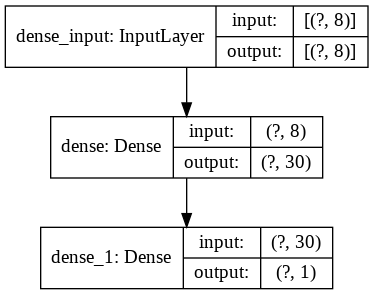

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
model(x_batch)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.17273085],
       [0.3564985 ],
       [0.45343593]], dtype=float32)>

In [ ]:
batch_size=32
model.fit(train_set,steps_per_epoch=len(x_train)//batch_size,epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 1s 3ms/step - loss: 1.4679 - val_loss: 21.5124
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8735 - val_loss: 0.6648
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6196
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5933 - val_loss: 0.5669
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5629 - val_loss: 0.5402
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5693 - val_loss: 0.5209
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5231 - val_loss: 0.6130
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5074 - val_loss: 0.4818
Epoch 9/10
362/362 [==============================] - 1s 2ms/step - loss: 0.4963 - val_loss: 0.4904
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5023 - val_loss: 0.458

In [ ]:
model.predict(x_batch)

array([[0.9079596],
       [1.3787876],
       [2.2512956]], dtype=float32)

In [ ]:
model.evaluate(test_set,steps=len(x_test)//batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.4788


0.4787752032279968

In [ ]:
new_set=test_set.map(lambda x,y:x)
x_new=x_test
model.predict(new_set,steps=len(x_new)//batch_size)

array([[2.3576405 ],
       [2.255291  ],
       [1.4437604 ],
       ...,
       [0.56543916],
       [3.9442453 ],
       [1.0232248 ]], dtype=float32)

In [ ]:
optimizer=keras.optimizers.Nadam(lr=0.01)
loss_fn=keras.losses.mean_squared_error

@tf.function
def train(model,n_epochs,batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
  train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
  for x_batch,y_batch in train_set:
    with tf.GradientTape() as tape:
      y_pred=model(x_batch)
      main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
      loss=tf.add_n([main_loss]+model.losses)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

In [ ]:
train(model,5)

Tensor("stack_1:0", shape=(1,), dtype=float32)
Tensor("stack_1:0", shape=(1,), dtype=float32)


The Features API

In [ ]:
import os
import tarfile
import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
  os.makedirs(housing_path,exist_ok=True)
  tgz_path=os.path.join(housing_path,'housing.tgz')
  urllib.request.urlretrieve(housing_url,tgz_path)
  housing_tgz=tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path=os.path.join(housing_path,'housing.csv')
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
x_mean

array([ 3.89175860e+00,  2.86245478e+01,  5.45593655e+00,  1.09963474e+00,
        1.42428122e+03,  2.95886657e+00,  3.56464315e+01, -1.19584363e+02])

In [ ]:
housing_median_age=tf.feature_column.numeric_column('housing_median_age')

In [ ]:
age_mean,age_std=x_mean[1],x_std[1]
housing_median_age=tf.feature_column.numeric_column(
    'housing_numeric_column',normalizer_fn=lambda x:(x-age_mean)/age_std)

In [ ]:
housing_median_age

NumericColumn(key='housing_numeric_column', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <lambda> at 0x7f8b3fcdc488>)

In [ ]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income=tf.feature_column.bucketized_column(
    median_income,boundaries=[1.5,3.,4.5,6.])

In [ ]:
ocean_prox_vocab=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity=tf.feature_column.categorical_column_with_vocabulary_list(
    'ocean_proximity',ocean_prox_vocab)

Handling categorical values

In [ ]:
vocab=['<IH OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']
indices=tf.range(len(vocab), dtype=tf.int64)

In [ ]:
table_init=tf.lookup.KeyValueTensorInitializer(vocab,indices)

In [ ]:
num_oov_buckets=2
table=tf.lookup.StaticVocabularyTable(table_init,num_oov_buckets)

In [ ]:
table

In [ ]:
categories=tf.constant(['NEAR BAY','DESERT','INLAND','INLAND'])
cat_indices=table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [ ]:
cat_one_hot=tf.one_hot(cat_indices,depth=len(vocab)+num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
embedding_dim=2
emb_init=tf.random.uniform([len(vocab)+num_oov_buckets,embedding_dim])

In [ ]:
emb_init

<tf.Tensor: shape=(7, 2), dtype=float32, numpy=
array([[0.68789124, 0.48447883],
       [0.9309944 , 0.252187  ],
       [0.73115396, 0.89256823],
       [0.94674826, 0.7493341 ],
       [0.34925628, 0.54718256],
       [0.26160395, 0.69734323],
       [0.11962581, 0.53484344]], dtype=float32)>

In [ ]:
embedding_matrix=tf.Variable(emb_init)
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.68789124, 0.48447883],
       [0.9309944 , 0.252187  ],
       [0.73115396, 0.89256823],
       [0.94674826, 0.7493341 ],
       [0.34925628, 0.54718256],
       [0.26160395, 0.69734323],
       [0.11962581, 0.53484344]], dtype=float32)>

In [ ]:
embedding=tf.keras.layers.Embedding(input_dim=len(vocab)+num_oov_buckets,
                                    output_dim=embedding_dim)
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.0426784 , -0.04786297],
       [ 0.01936141, -0.04267867],
       [-0.04826153, -0.01568551],
       [-0.04826153, -0.01568551]], dtype=float32)>

TensorFlow Datasets

In [ ]:
import tensorflow_datasets as tfds

datasets=tfds.load(name='mnist')
mnist_train,mnist_test=datasets['train'],datasets['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image

In [ ]:
mnist_train

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [ ]:
mnist_train=mnist_train.map(lambda items:(items['image'],items['label']))

In [ ]:
for images,labels in mnist_train.take(1):
  print(images.shape)
  print(labels)

(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)


In [ ]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels)

(32, 28, 28, 1)
tf.Tensor([4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3], shape=(32,), dtype=int64)


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28,28,1]),
      keras.layers.Lambda(lambda images:tf.cast(images,tf.float32)),
      keras.layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['accuracy'])

In [ ]:
model.fit(mnist_train,steps_per_epoch=60000//32,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 32.4609 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 25.9660 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 25.3121 - accuracy: 0.8725
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 24.4634 - accuracy: 0.8762
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 23.9858 - accuracy: 0.8777


Using Standardization

In [ ]:
class Standarization(keras.layers.Layer):
  def adapt(self,data_sample):
    self.means=np.mean(data_sample,axis=0,keepdims=True)
    self.stds=np.std(data_sample,axis=0,keepdims=True)
  def call(self,inputs):
    return (inputs-self.means)/(self.stds+keras.backend.epsilon()) 

In [ ]:
std_layer=Standarization()
std_layer.adapt(data_sample)
#The we can do model.add(std_layer)

In [ ]:
means=np.mean(x_train,axis=0,keepdims=True)
stds=np.std(x_train,axis=0,keepdims=True)
eps=keras.backend.epsilon()
model=keras.models.Sequential([
    keras.layers.Lambda(lambda inputs:(inputs-means)/(stds+eps))
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",metrics=["accuracy"])

In [ ]:
model.fit(mnsit_train,epochs=5)